Unblinding test -- look at blinded chains where we drop bins and see how much S8 changes

In [1]:
import getdist
import pylab as mplot
import numpy as np
import astropy.io.fits as pf
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import os
from getdist import plots, MCSamples

import matplotlib
%matplotlib inline
# matplotlib.use('TkAgg')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_chain_info(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-3):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-3,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name

# polychord
def load_chain_info2(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-4):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-4,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name



In [3]:
def weighted_percentile(data, percents, weights=None):

    if weights is None:
        return np.percentile(data, percents)
    ind = np.argsort(data)
    d = data[ind]
    w = weights[ind]
    p = 1.*w.cumsum()/w.sum()*100
    y = np.interp(percents, p, d)
    return y

def print_constraints(s8, w):
    low = weighted_percentile(s8, 16, weights=w)
    high = weighted_percentile(s8, 84, weights=w)
    mean = np.average(s8, weights=w)
    print("$%.4f_{-%.4f}^{+%.4f}$" % (mean, mean-low, high-mean))

In [4]:
chain_dir = '/project/chihway/chihway/CosmicShearCosmosis/analysis/delve-campaign/'

# fiducial, data
c_0, n_0, name_0 = load_chain_info(chain_dir+'data_fiducial-data-blinded_20240901/fiducial-data-blinded.txt')
# fiducial, data, drop bin1
c_1, n_1, name_1 = load_chain_info(chain_dir+'data_fiducial-data-blinded-drop-bin1_20240901/fiducial-data-blinded-drop-bin1.txt')
# fiducial, data, drop bin2
c_2, n_2, name_2 = load_chain_info(chain_dir+'data_fiducial-data-blinded-drop-bin2_20240901/fiducial-data-blinded-drop-bin2.txt')
# fiducial, data, drop bin3
c_3, n_3, name_3 = load_chain_info(chain_dir+'data_fiducial-data-blinded-drop-bin3_20240901/fiducial-data-blinded-drop-bin3.txt')
# fiducial, data, drop bin4
c_4, n_4, name_4 = load_chain_info(chain_dir+'data_fiducial-data-blinded-drop-bin4_20240901/fiducial-data-blinded-drop-bin4.txt')


[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

17400
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

21300
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

15500
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

14400
[00]

## Plot chains dropping the different bins

In [9]:
def read_samples(cc, label):

    sample = MCSamples(samples = np.c_[cc[:,0],cc[:,1],cc[:,2],cc[:,3],cc[:,4],cc[:,5],cc[:,6],cc[:,7],cc[:,8],
                       cc[:,9],cc[:,10],cc[:,11],cc[:,12],cc[:,13],cc[:,14],cc[:,15],cc[:,16], cc[:,16]*np.sqrt(cc[:,0]/0.3)],
                weights = np.exp(cc[:,19]),
                names   = ['omegam', 'h0', 'omegab', 'ns', 'as', 'omnuh2', 'm1', 'm2' ,'m3', 'm4', 
                           'bias1','bias2','bias3','bias4', 'a1', 'alpha1', 'sigma8', 'S8'],
                labels  = [ #'omegam', 'h0', 'omegab', 'ns', 'as', 'omnuh2', 'm1', 'm2' ,'m3', 'm4', 
                           #'bias1','bias2','bias3','bias4', 'a1', 'alpha1', 'sigma8', 'S8'],
                    '\Omega_m','h_0','\Omega_b', 'n_s', 'A_s', '\Omega_{\\nu} h^2', 'm_1', 'm_2', 'm_3', 'm_4',
                           '\Delta z_1', '\Delta z_2', '\Delta z_3', '\Delta z_4', 'A_{IA}', '\eta', '\sigma_8','S_8'],
                label   = label)
    return sample

In [10]:
samp_0 = read_samples(c_0, "Fiducial")
samp_1 = read_samples(c_1, "Drop bin 1")
samp_2 = read_samples(c_2, "Drop bin 2")
samp_3 = read_samples(c_3, "Drop bin 3")
samp_4 = read_samples(c_4, "Drop bin 4")

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


## Fiducial, full parameter space

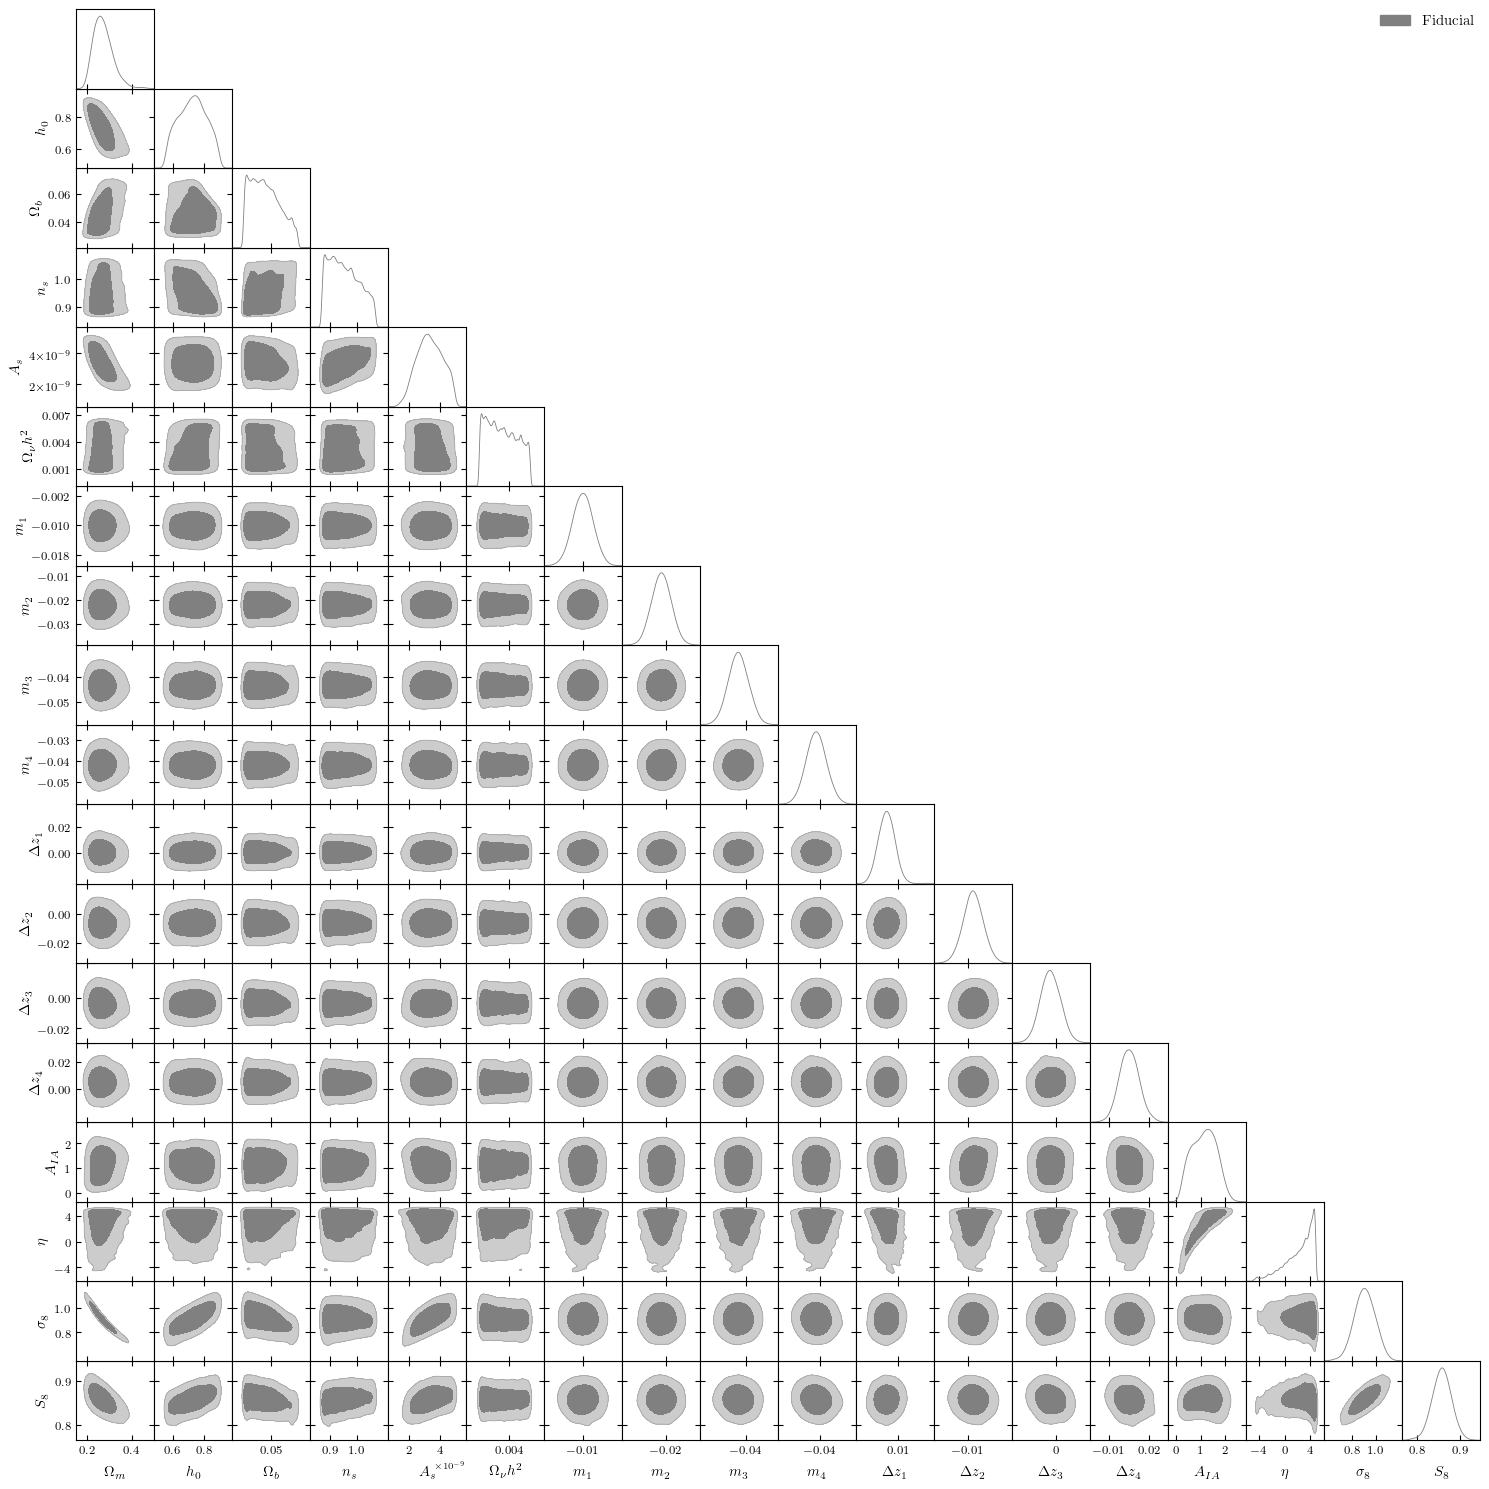

In [12]:
g = plots.get_subplot_plotter(width_inch=15)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([samp_0],
                ['omegam', 'h0', 'omegab', 'ns', 'as', 'omnuh2', 'm1', 'm2' ,'m3', 'm4', 
                           'bias1','bias2','bias3','bias4', 'a1', 'alpha1', 'sigma8', 'S8'], 
                filled=[True],
                alpha=[1],
                lw = [3],
                legend_labels=["Fiducial"], 
                legend_loc='upper right',  
                contour_colors=['gray'])

## Fiducial, drop bins

fiducial S_8 = 0.857\pm 0.023
drop bin 1 S_8 = 0.853^{+0.039}_{-0.015}
drop bin 2 S_8 = 0.863\pm 0.026
drop bin 3 S_8 = 0.868\pm 0.026
drop bin 4 S_8 = 0.827\pm 0.030


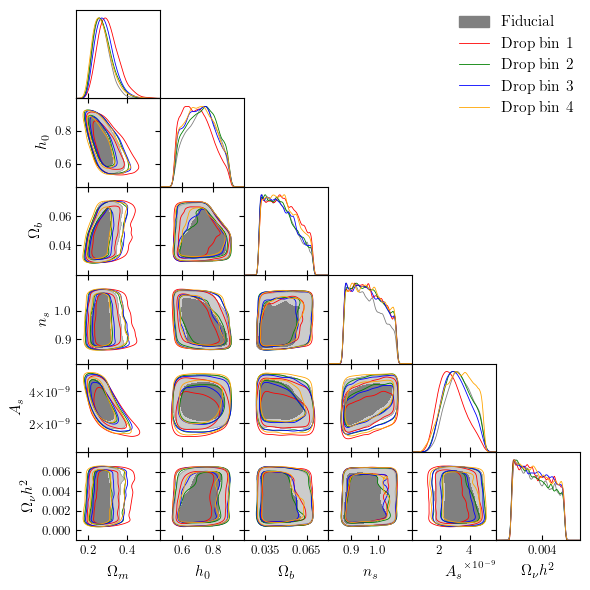

In [13]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([samp_0, samp_1, samp_2, samp_3, samp_4],
                ['omegam', 'h0', 'omegab', 'ns', 'as', 'omnuh2'], 
                filled=[True, False, False, False, False],
                alpha=[1, 1, 1, 1, 1],
                lw = [0,3,3,3,3],
                legend_labels=["Fiducial", "Drop bin 1", "Drop bin 2", "Drop bin 3", "Drop bin 4"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'r', 'g', 'b', 'orange'])


print('fiducial', samp_0.getInlineLatex('S8',limit=1))
print('drop bin 1', samp_1.getInlineLatex('S8',limit=1))
print('drop bin 2', samp_2.getInlineLatex('S8',limit=1))
print('drop bin 3', samp_3.getInlineLatex('S8',limit=1))
print('drop bin 4', samp_4.getInlineLatex('S8',limit=1))

mplot.savefig('blinded_data_zbin_cosmo.pdf', bbox_inches='tight')

fiducial S_8 = 0.857\pm 0.023
drop bin 1 S_8 = 0.853^{+0.039}_{-0.015}
drop bin 2 S_8 = 0.863\pm 0.026
drop bin 3 S_8 = 0.868\pm 0.026
drop bin 4 S_8 = 0.827\pm 0.030


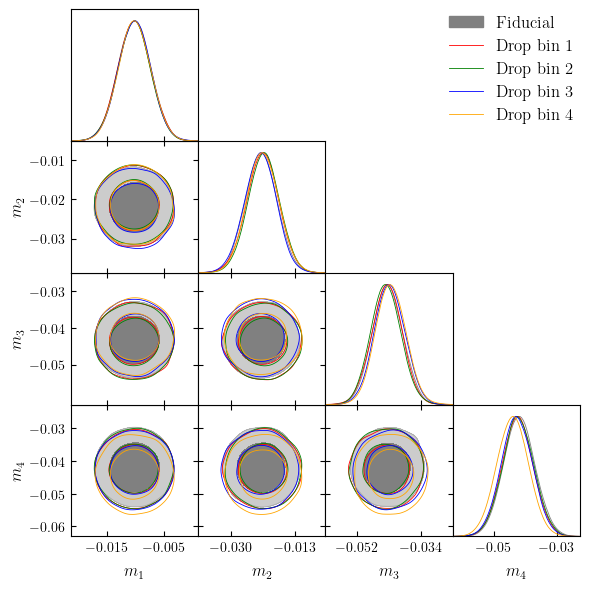

In [14]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([samp_0, samp_1, samp_2, samp_3, samp_4],
                ['m1', 'm2' ,'m3', 'm4'], 
                filled=[True, False, False, False, False],
                alpha=[1, 1, 1, 1, 1],
                lw = [0,3,3,3,3],
                legend_labels=["Fiducial", "Drop bin 1", "Drop bin 2", "Drop bin 3", "Drop bin 4"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'r', 'g', 'b', 'orange'])


print('fiducial', samp_0.getInlineLatex('S8',limit=1))
print('drop bin 1', samp_1.getInlineLatex('S8',limit=1))
print('drop bin 2', samp_2.getInlineLatex('S8',limit=1))
print('drop bin 3', samp_3.getInlineLatex('S8',limit=1))
print('drop bin 4', samp_4.getInlineLatex('S8',limit=1))

mplot.savefig('blinded_data_zbin_shear.pdf', bbox_inches='tight')

fiducial S_8 = 0.857\pm 0.023
drop bin 1 S_8 = 0.853^{+0.039}_{-0.015}
drop bin 2 S_8 = 0.863\pm 0.026
drop bin 3 S_8 = 0.868\pm 0.026
drop bin 4 S_8 = 0.827\pm 0.030


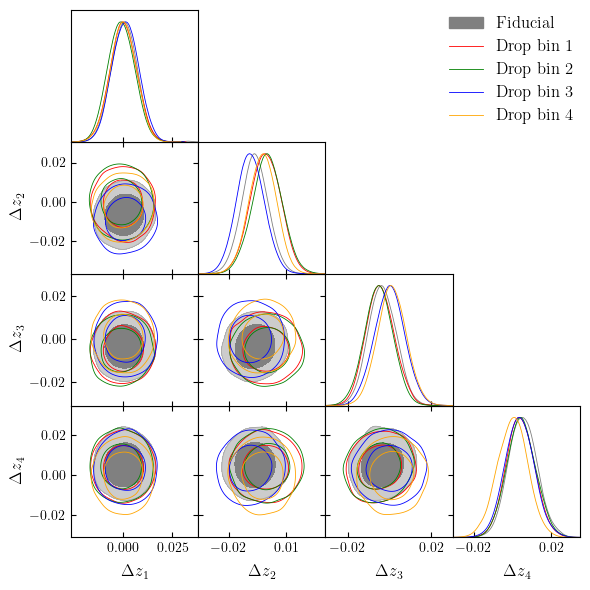

In [17]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([samp_0, samp_1, samp_2, samp_3, samp_4],
                ['bias1','bias2','bias3','bias4'], 
                filled=[True, False, False, False, False],
                alpha=[1, 1, 1, 1, 1],
                lw = [0,3,3,3,3],
                legend_labels=["Fiducial", "Drop bin 1", "Drop bin 2", "Drop bin 3", "Drop bin 4"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'r', 'g', 'b', 'orange'])


print('fiducial', samp_0.getInlineLatex('S8',limit=1))
print('drop bin 1', samp_1.getInlineLatex('S8',limit=1))
print('drop bin 2', samp_2.getInlineLatex('S8',limit=1))
print('drop bin 3', samp_3.getInlineLatex('S8',limit=1))
print('drop bin 4', samp_4.getInlineLatex('S8',limit=1))

mplot.savefig('blinded_data_zbin_pz.pdf', bbox_inches='tight')

fiducial S_8 = 0.857\pm 0.023
drop bin 1 S_8 = 0.853^{+0.039}_{-0.015}
drop bin 2 S_8 = 0.863\pm 0.026
drop bin 3 S_8 = 0.868\pm 0.026
drop bin 4 S_8 = 0.827\pm 0.030


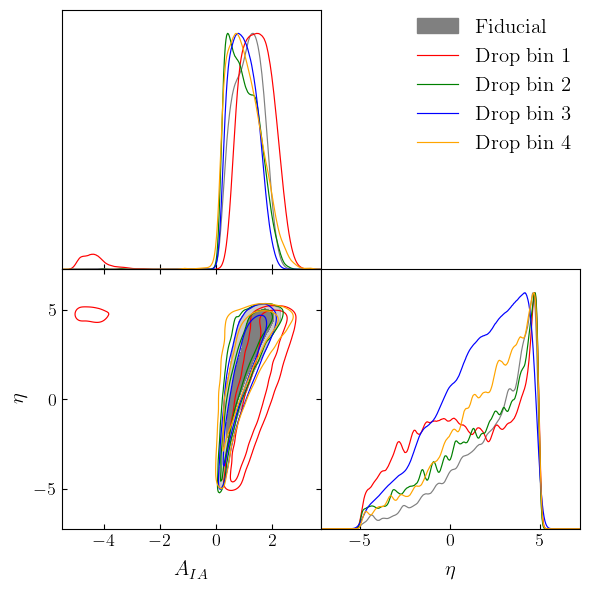

In [16]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([samp_0, samp_1, samp_2, samp_3, samp_4],
                ['a1', 'alpha1'], 
                filled=[True, False, False, False, False],
                alpha=[1, 1, 1, 1, 1],
                lw = [0,3,3,3,3],
                legend_labels=["Fiducial", "Drop bin 1", "Drop bin 2", "Drop bin 3", "Drop bin 4"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'r', 'g', 'b', 'orange'])


print('fiducial', samp_0.getInlineLatex('S8',limit=1))
print('drop bin 1', samp_1.getInlineLatex('S8',limit=1))
print('drop bin 2', samp_2.getInlineLatex('S8',limit=1))
print('drop bin 3', samp_3.getInlineLatex('S8',limit=1))
print('drop bin 4', samp_4.getInlineLatex('S8',limit=1))

mplot.savefig('blinded_data_zbin_ia.pdf', bbox_inches='tight')

In [9]:
# look at full parameter space